[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


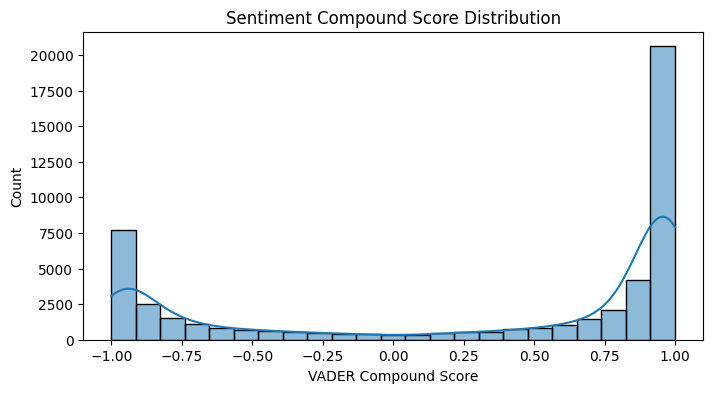

R² Score: 0.9850268865827567


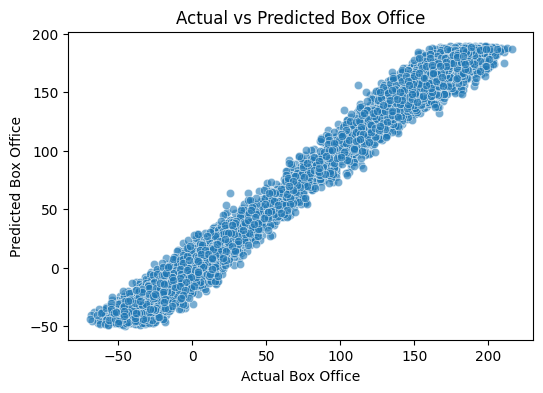

In [ ]:
#installing necessary libraries
!pip install nltk scikit-learn matplotlib seaborn --quiet

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

nltk.download('vader_lexicon')


df = pd.read_csv("/content/IMDB Dataset.csv", engine='python')  # Upload this manually if running in Colab

#cleaning
df.dropna(inplace=True)
df['review'] = df['review'].astype(str)

# Sentiment Scoring using VADER
sia = SentimentIntensityAnalyzer()
df['compound_score'] = df['review'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Convert labels to binary (1 = pos, 0 = neg)
df['sentiment_label'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

# Visualize Sentiment Distribution
plt.figure(figsize=(8,4))
sns.histplot(df['compound_score'], kde=True)
plt.title('Sentiment Compound Score Distribution')
plt.xlabel('VADER Compound Score')
plt.show()

# Simulate IMDB ratings and box office
np.random.seed(42)
df['imdb_rating'] = np.random.uniform(5.0, 9.0, len(df))
df['box_office'] = df['compound_score'] * 100 + df['imdb_rating'] * 10 + np.random.normal(0, 10, len(df))

# Regression Model
X = df[['compound_score', 'imdb_rating']]
y = df['box_office']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print("R² Score:", r2_score(y_test, y_pred))

# plot Actual vs Predicted
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Box Office")
plt.ylabel("Predicted Box Office")
plt.title("Actual vs Predicted Box Office")
plt.show()